In [2]:
# Import Dependencies
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import display

In [3]:
# My Twitter API Authentication Variables
consumer_key = 'pbQMEvJatfxxSX8ORSpK56z5F'
consumer_secret = 'd0uNmiUOi3QPO55ddON9z6RmYG3rECR3eZ1eM320aIsFFFfCr9'
access_token = '147251524-2AVNxzQb0rrpzkxTpwZofgWFPXHQWSFJQa4EvqwQ'
access_token_secret = 'aXZlCCVxa0If7mPu62ArdOn0pLr2S77AKRUzzZc1ErGXd'

In [4]:
# Authenticate with Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [5]:
# Cleaning Function (Modified to remove RT tags and Image URls' by the end of a tweet)

import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text ina tweet by removing
    links and special characters using RegEx.
    '''
    return ' '.join(re.sub("RT|(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|https.*$", " ", tweet).split())

In [40]:
# Find related Tweets
tweets = api.search(q="Avengers", lang="en", count=100, tweet_mode="extended")
english_tweets = []
unique_english_tweets = []

for tweet in tweets:
    # Making sure that we only pass Enlish Tweets (Just to understand lol)
    if tweet.lang == "en":
        for tweet in tweets:
            try:
                # Getting the whole text if the tweet was actually a retweet
                english_tweets.append(tweet.retweeted_status.full_text)
            except AttributeError:
                # Getting the whole text if the tweet wasn't a retweet
                english_tweets.append(tweet.full_text)
                
for tweet in english_tweets:
    if tweet not in unique_english_tweets:
        unique_english_tweets.append(tweet)
    
        
# Creating  clean pandas dataframe
data = pd.DataFrame(data=[clean_tweet(tweet) for tweet in unique_english_tweets], columns=['Tweets'])

# Dislpaying the first 10 elements of the dataframe
display(data.head(10))

# Meta Data from a single Tweet
print(tweets[1].id)
print(tweets[1].created_at)
print(tweets[1].source)
print(tweets[1].favorite_count)
print(tweets[1].retweet_count)
print(tweets[1].geo)
print(tweets[1].coordinates)
print(tweets[1].entities)

,Tweets
0,Marvel has released this promo image featuring...
1,not to be dramatic but this avengers poster si...
2,John Wick 3 Release Date Spoilers Keanu Reeves...
3,I see parallels between Endgame and DetectiveC...
4,the skrulls came to fight with the avengers th...
5,With the spoiler ban lifted the Avengers Endga...
6,The most powerful Avengers are women CaptainMa...
7,Info we learned from Taylor s interview with E...
8,Avengers Endgame is approaching the Avatar record
9,An Epic Finale Marvel Avengers Endgame Graphic...


1128617127848566786
2019-05-15 11:04:26
Twitter for Android
0
3625
None
None
{'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': [{'id_str': '1094366717977849856', 'indices': [3, 12], 'id': 1094366717977849856, 'screen_name': 'rvmanova', 'name': '𝐠𝐫𝐚𝐜𝐞'}]}


In [41]:
# Gather lexicon data 
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Suwadith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
# Go through the Tweets and analayze their sentiment

sid = SentimentIntensityAnalyzer()

list = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  list.append(ss)
  
se = pd.Series(list)
data['polarity'] = se.values



# Display the first 100 elements of the dataframe
display(data.head(100))

,Tweets,polarity
0,Marvel has released this promo image featuring...,"{'neg': 0.0, 'pos': 0.156, 'compound': 0.7269,..."
1,not to be dramatic but this avengers poster si...,"{'neg': 0.0, 'pos': 0.056, 'compound': 0.1531,..."
2,John Wick 3 Release Date Spoilers Keanu Reeves...,"{'neg': 0.0, 'pos': 0.1, 'compound': 0.25, 'ne..."
3,I see parallels between Endgame and DetectiveC...,"{'neg': 0.0, 'pos': 0.259, 'compound': 0.6739,..."
4,the skrulls came to fight with the avengers th...,"{'neg': 0.271, 'pos': 0.0, 'compound': -0.9274..."
5,With the spoiler ban lifted the Avengers Endga...,"{'neg': 0.186, 'pos': 0.144, 'compound': -0.20..."
6,The most powerful Avengers are women CaptainMa...,"{'neg': 0.0, 'pos': 0.279, 'compound': 0.4754,..."
7,Info we learned from Taylor s interview with E...,"{'neg': 0.14, 'pos': 0.06, 'compound': -0.6124..."
8,Avengers Endgame is approaching the Avatar record,"{'neg': 0.0, 'pos': 0.0, 'compound': 0.0, 'neu..."
9,An Epic Finale Marvel Avengers Endgame Graphic...,"{'neg': 0.0, 'pos': 0.177, 'compound': 0.4215,..."


In [43]:
# Export the results to a csv file
prediction = pd.DataFrame(data, columns=['Tweets', 'polarity']).to_csv('prediction.csv')

In [44]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Suwadith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [86]:
# print(unique_english_tweets[0])
# print(clean_tweet(unique_english_tweets[0]))

#remove stopwords
from stop_words import get_stop_words

cleaned_unique_english_tweets = []

stop_words = get_stop_words('en')

for tweet in unique_english_tweets:
    all_words = clean_tweet(tweet).split(" ")
    for word in all_words: 
        cleaned_unique_english_tweets.append(word)

In [87]:
!pip install wordcloud

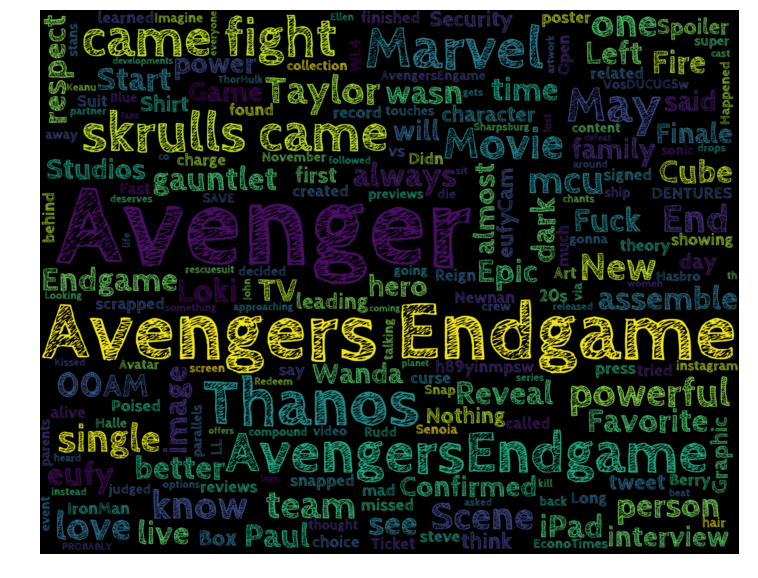

In [85]:
import os

from os import path
from wordcloud import WordCloud

text = " ".join(cleaned_unique_english_tweets)

# Generate a word cloud image
wordcloud = WordCloud(font_path='CabinSketch-Bold.ttf',
                      background_color='black',
                      width=1800,
                      height=1400).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()
